In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import model_selection, linear_model, ensemble,tree, metrics

In [217]:
train = pd.read_csv("E:\\Data_Set\\Loan Prediction\\Train.csv")
test = pd.read_csv("E:\\Data_Set\\Loan Prediction\\Test.csv")

train.shape, test.shape

((614, 13), (367, 12))

In [218]:
data = pd.concat([train,test],axis = 0)
data.shape

(981, 13)

In [219]:
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [221]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [222]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [223]:
for col in data.columns:
    if data[col].dtypes == 'object':
         data[col] = data[col].fillna(f"{data[col].mode()}")
    else:
        data[col] = data[col].fillna(f"{data[col].median()}")

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [224]:
for col in data.columns:
    print(col, ':', len(data[col].unique()),'label')

Loan_ID : 981 label
Gender : 3 label
Married : 3 label
Dependents : 5 label
Education : 2 label
Self_Employed : 3 label
ApplicantIncome : 752 label
CoapplicantIncome : 437 label
LoanAmount : 233 label
Loan_Amount_Term : 13 label
Credit_History : 3 label
Property_Area : 3 label
Loan_Status : 3 label


In [225]:
data.drop('Loan_ID',axis = 1,inplace = True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [226]:
data.Gender.unique()

array(['Male', 'Female', '0    Male\ndtype: object'], dtype=object)

In [227]:
data['Married'].unique()

array(['No', 'Yes', '0    Yes\ndtype: object'], dtype=object)

In [228]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', '0    0\ndtype: object'], dtype=object)

In [229]:
data['Self_Employed'].unique()

array(['No', 'Yes', '0    No\ndtype: object'], dtype=object)

In [230]:
data['Loan_Status'].unique()

array(['Y', 'N', '0    Y\ndtype: object'], dtype=object)

In [231]:
data['Credit_History'].unique()

array([1.0, 0.0, '1.0'], dtype=object)

In [232]:
data['Credit_History'].replace({ '1.0' :1}, inplace = True)
data['Credit_History'] = data['Credit_History'].astype('int64')

In [233]:
data['Gender'].replace({'0    Male\ndtype: object':'Male'}, inplace = True)
data['Married'].replace({'0    Yes\ndtype: object':'Yes'}, inplace = True)
data['Dependents'].replace({'0    0\ndtype: object':'0','3+':'3'}, inplace = True)
data['Self_Employed'].replace({'0    No\ndtype: object':'No'}, inplace = True)
data['Loan_Status'].replace({'0    Y\ndtype: object':'Y'}, inplace = True)

In [234]:
data['LoanAmount'] = data['LoanAmount'].astype('float64').round(1)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('float64').round(1)

In [235]:
for col in data.select_dtypes(include='object'):
    print(col, ':', len(data[col].unique()),'label')

Gender : 2 label
Married : 2 label
Dependents : 4 label
Education : 2 label
Self_Employed : 2 label
Property_Area : 3 label
Loan_Status : 2 label


In [236]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [237]:
data['Dependents'] = data['Dependents'].astype('float64')

In [238]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,126.0,360.0,1,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


## EDA

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>]], dtype=object)

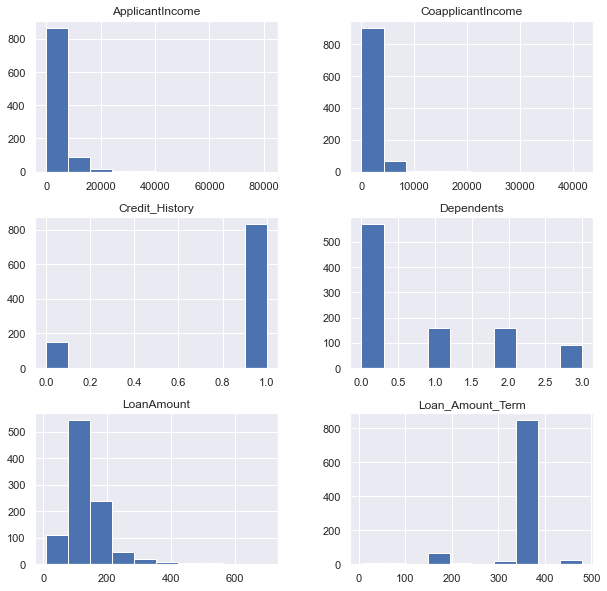

In [239]:
data.hist(figsize = (10,10))

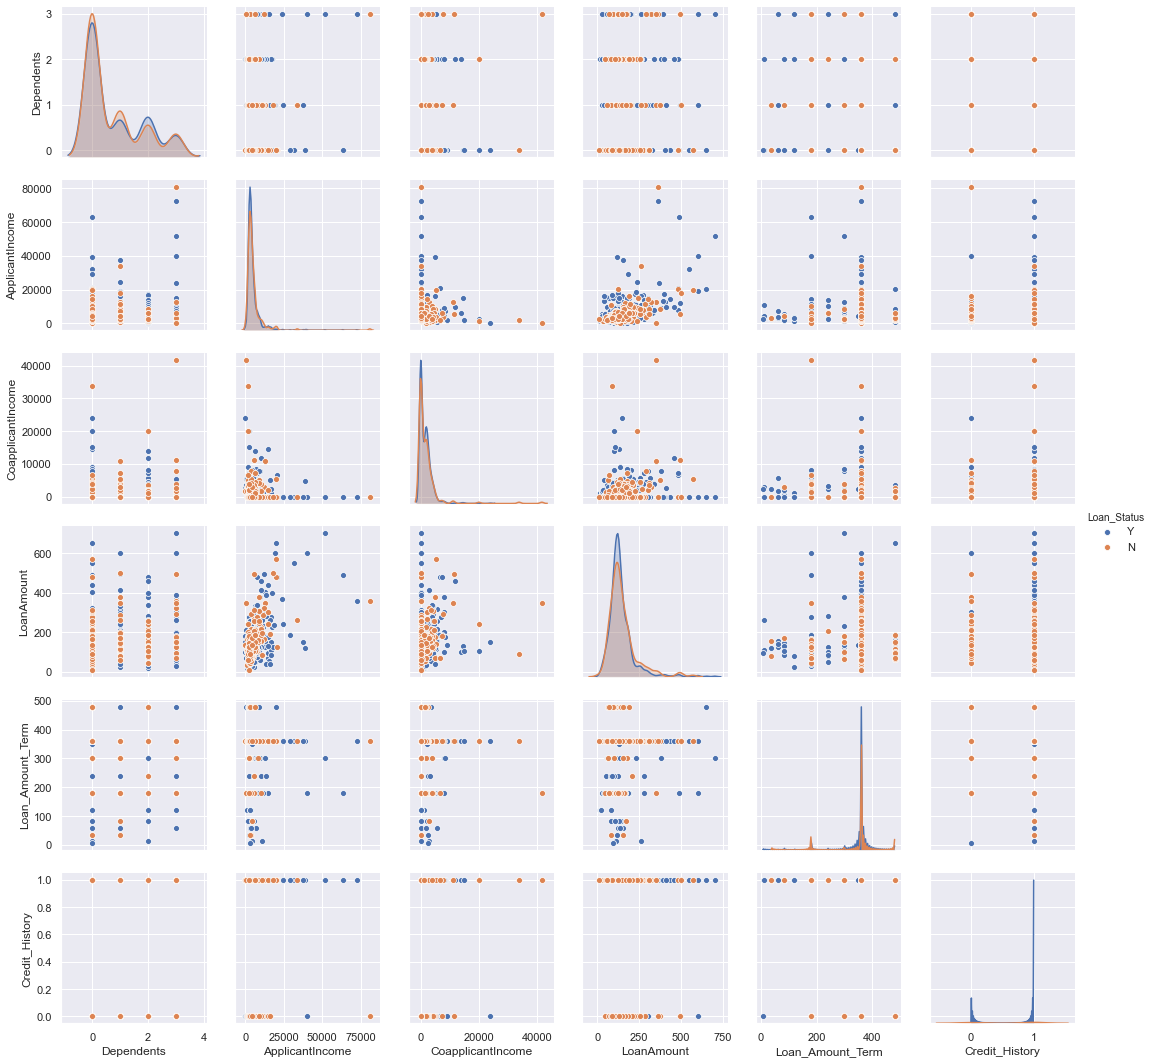

In [240]:
sns.pairplot(data =data, hue = 'Loan_Status')
plt.show()

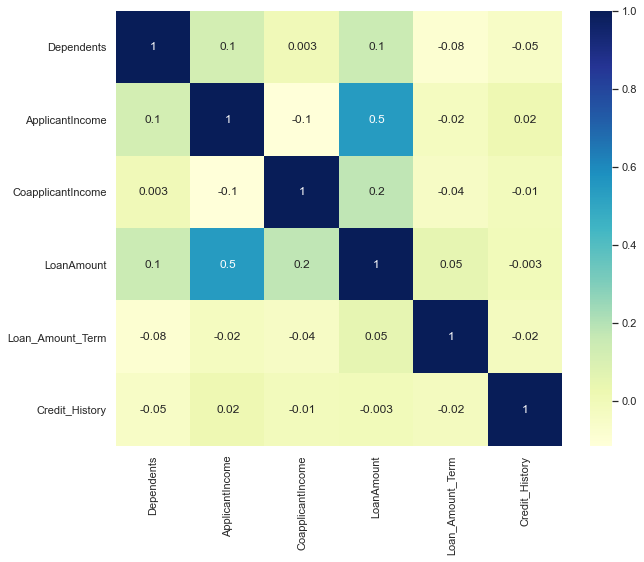

In [241]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),fmt='.1g' , annot = True, cmap = "YlGnBu")
plt.show()

<AxesSubplot:>

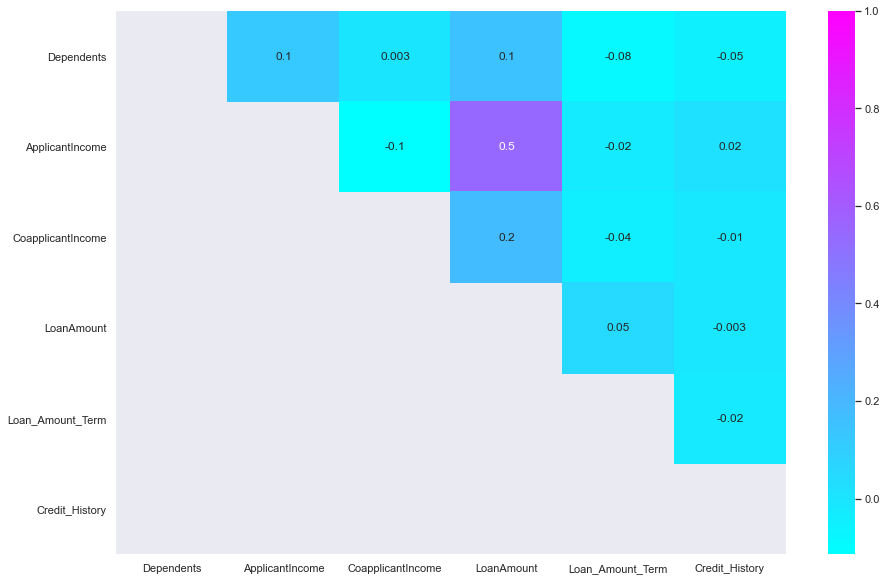

In [242]:
plt.figure(figsize=(15,10))
mask = np.tril(data.corr())
sns.heatmap(data.corr(), fmt='.1g', annot = True, cmap= 'cool', mask=mask)

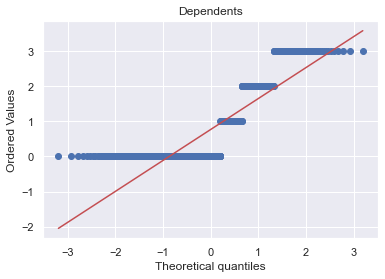

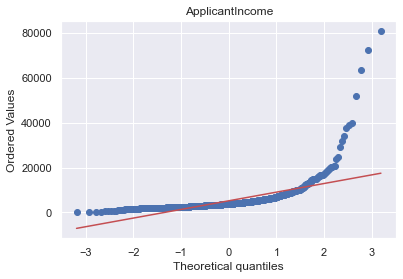

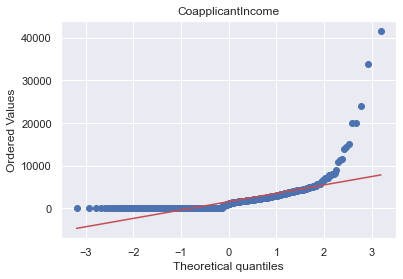

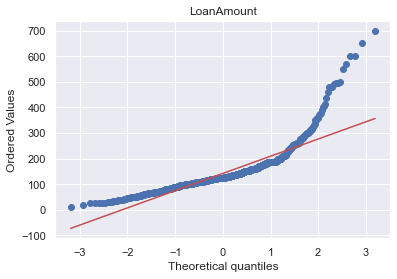

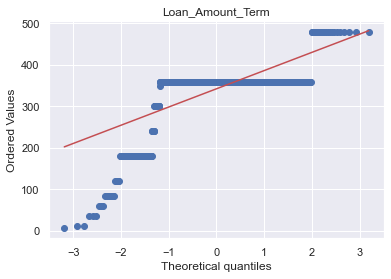

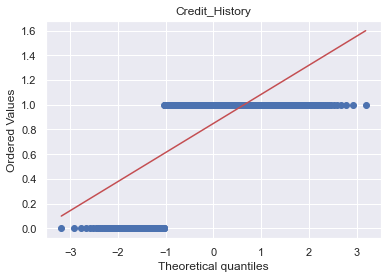

In [243]:
from scipy import stats
for feature in data.select_dtypes(exclude='object').columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [244]:
sns.set(style="darkgrid")

<AxesSubplot:xlabel='Gender', ylabel='count'>

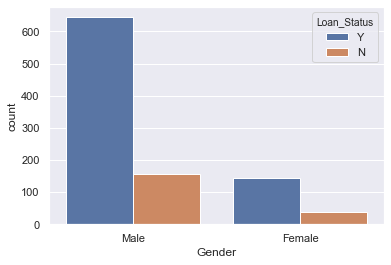

In [245]:
sns.countplot(x = 'Gender' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

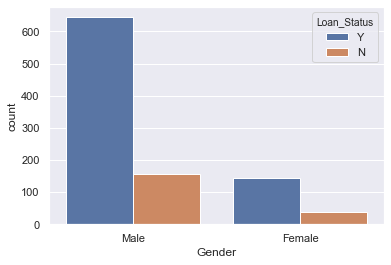

In [246]:
sns.countplot(x = 'Gender' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

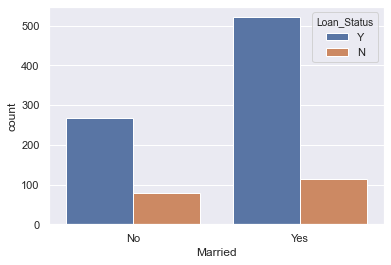

In [247]:
sns.countplot(x = 'Married' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

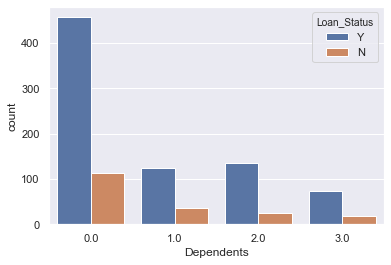

In [248]:
sns.countplot(x = 'Dependents' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

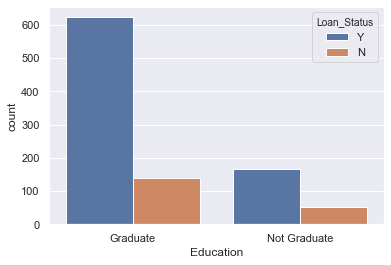

In [249]:
sns.countplot(x = 'Education' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

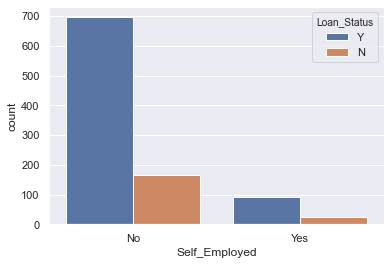

In [250]:
sns.countplot(x = 'Self_Employed' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

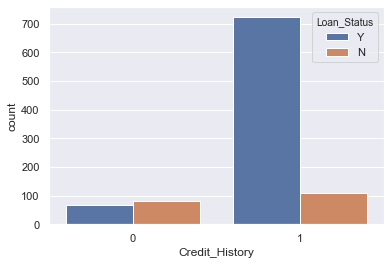

In [251]:
sns.countplot(x = 'Credit_History' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

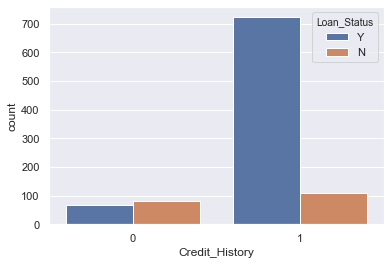

In [252]:
sns.countplot(x = 'Credit_History' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

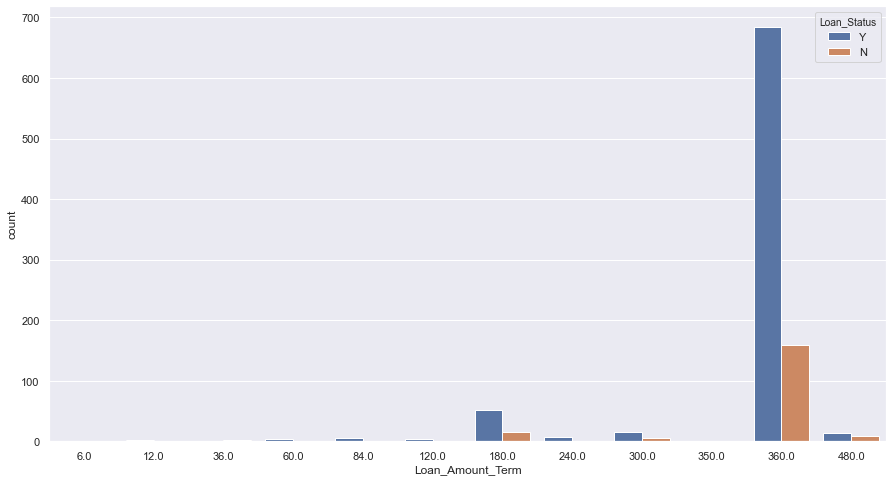

In [253]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Loan_Amount_Term' ,  hue = 'Loan_Status', data=data)

<AxesSubplot:xlabel='ApplicantIncome'>

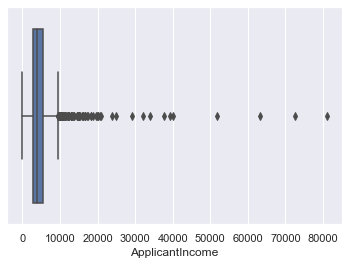

In [254]:
sns.boxplot(data.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

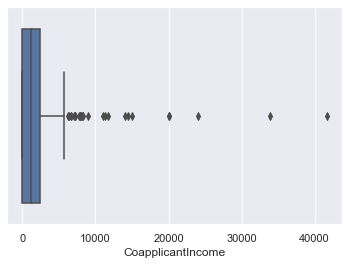

In [255]:
sns.boxplot(data.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount'>

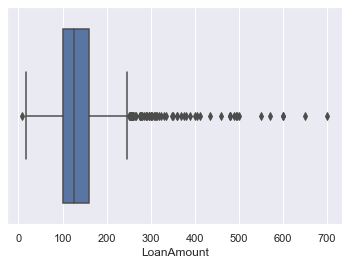

In [256]:
sns.boxplot(data.LoanAmount)

In [257]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})
data['Married'] = data['Married'].replace({'Yes':1, 'No':0})
data['Education'] = data['Education'].replace({'Not Graduate':0, 'Graduate':1})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1, 'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Urban':0, 'Rural':1,'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].replace({'N':0, 'Y':1})

In [263]:
train = data[:len(train)]
test = data[len(train):]
test.drop('Loan_Status', axis = 1, inplace = True)
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)

In [264]:
train.shape, test.shape

((614, 12), (367, 11))

# Using Mutliple Algorithm

In [271]:
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

<AxesSubplot:>

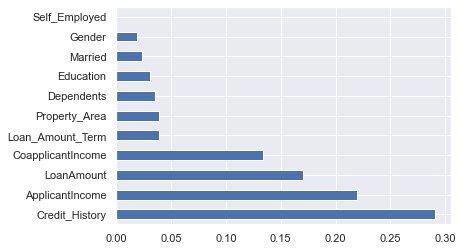

In [272]:
feat_importances = pd.Series(model_DT.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')

In [274]:
data  =data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']]

data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,126.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


## DecisionTreeClassifier

In [275]:
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
pred_DT = model_DT.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,pred_DT)
Accuary_DT = metrics.accuracy_score(y_test,pred_DT)
Report_DT = metrics.classification_report(y_test,pred_DT)

print("Accuary_DT\n",Accuary_DT, "\n\nClassification_Report\n",Report_DT, "\n\nConfusion_Matrix\n", confusion_matrix)

Accuary_DT
 0.7142857142857143 

Classification_Report
               precision    recall  f1-score   support

           0       0.48      0.60      0.53        42
           1       0.83      0.76      0.79       112

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.66       154
weighted avg       0.74      0.71      0.72       154
 

Confusion_Matrix
 [[25 17]
 [27 85]]


In [276]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_DT, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(), accuracies.std())

0.7000000000000001 0.0162680755946693


## RandomForestClassifier

In [277]:
model_RFR = ensemble.RandomForestClassifier()
model_RFR.fit(X_train,y_train)
pred_RFR = model_RFR.predict(X_test)
Accuary_RFR = metrics.accuracy_score(y_test,pred_RFR)
confusion_matrix_RFR = metrics.confusion_matrix(y_test,pred_RFR)
Report_RFR = metrics.classification_report(y_test,pred_RFR)

print("Accuary_RFR\n",Accuary_RFR, "\n\nClassification_Report_RFR\n",Report_DT, "\n\nConfusion_Matrix_RFR\n", confusion_matrix_RFR)

Accuary_RFR
 0.8116883116883117 

Classification_Report_RFR
               precision    recall  f1-score   support

           0       0.48      0.60      0.53        42
           1       0.83      0.76      0.79       112

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.66       154
weighted avg       0.74      0.71      0.72       154
 

Confusion_Matrix_RFR
 [[ 20  22]
 [  7 105]]


In [278]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_RFR, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(), accuracies.std())

0.7826086956521741 0.024786422284763854


# Ridge Classifier

In [279]:
model_RC = linear_model.RidgeClassifier()
model_RC.fit(X_train,y_train)
pred_RC = model_RC.predict(X_test)
confusion_matrix_RC = metrics.confusion_matrix(y_test,pred_RC)
Accuary_RC = metrics.accuracy_score(y_test,pred_RC)
Report_RC = metrics.classification_report(y_test,pred_RC)
    
print("Accuary_RC\n",Accuary_RC, "\n\nClassification_Report_LR\n",Report_RC, "\n\nconfusion_matrix_RC\n", confusion_matrix_RC)

Accuary_RC
 0.8376623376623377 

Classification_Report_LR
               precision    recall  f1-score   support

           0       0.90      0.45      0.60        42
           1       0.83      0.98      0.90       112

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.75       154
weighted avg       0.85      0.84      0.82       154
 

confusion_matrix_RC
 [[ 19  23]
 [  2 110]]


In [280]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_RC, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(), accuracies.std())

0.8 0.022381804654319583


# LogisticRegression

In [281]:
model_LR = linear_model.LogisticRegression(random_state = 100)
model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_test)
confusion_matrix_LR = metrics.confusion_matrix(y_test,pred_LR)
Accuary_LR = metrics.accuracy_score(y_test,pred_LR)
Report_LR = metrics.classification_report(y_test,pred_LR)
    
print("Accuary_LR\n",Accuary_LR, "\n\nClassification_Report_LR\n",Report_LR, "\n\nConfusion_Matrix_LR\n", confusion_matrix_LR)

Accuary_LR
 0.8441558441558441 

Classification_Report_LR
               precision    recall  f1-score   support

           0       0.91      0.48      0.62        42
           1       0.83      0.98      0.90       112

    accuracy                           0.84       154
   macro avg       0.87      0.73      0.76       154
weighted avg       0.85      0.84      0.83       154
 

Confusion_Matrix_LR
 [[ 20  22]
 [  2 110]]


In [282]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_LR, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7934782608695652 0.05075051099969023


## Bayesian Optimization

In [283]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [284]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [285]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1f79db1b248>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1f79db1b688>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1f79db1bc08>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1f79db1bfc8>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1f79db1c3c8>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1f79db1cb08>}

In [286]:
def objective(space):
    model = ensemble.RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [287]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [09:33<00:00,  7.16s/trial, best loss: -0.8021739130434783]


{'criterion': 0,
 'max_depth': 770.0,
 'max_features': 3,
 'min_samples_leaf': 0.03253295429660763,
 'min_samples_split': 0.2812804358632327,
 'n_estimators': 6}

In [288]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
None
1500


In [289]:
best['min_samples_leaf']

0.03253295429660763

In [290]:
trainedforest = ensemble.RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)

In [291]:
print(metrics.confusion_matrix(y_test,predictionforest))
print(metrics.accuracy_score(y_test,predictionforest))
print(metrics.classification_report(y_test,predictionforest))
print(metrics.accuracy_score(y_test,predictionforest))

[[ 18  24]
 [  2 110]]
0.8311688311688312
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        42
           1       0.82      0.98      0.89       112

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154

0.8311688311688312


In [292]:
out = pd.read_csv("E:\\Data_Set\\Loan Prediction\\sample_submission.csv")

In [293]:
out = pd.read_csv("E:\\Data_Set\\Loan Prediction\\sample_submission.csv")
out['Loan_Status']= trainedforest.predict(test)
out['Loan_Status'] = out['Loan_Status'].replace({0 : 'N', 1: 'Y'})
out.to_csv("Output_Final.csv")

In [199]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [200]:
rf=ensemble.RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [201]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [202]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [203]:
from sklearn.metrics import accuracy_score
y_pred=rf_randomcv.predict(X_test)

In [204]:
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(metrics.classification_report(y_test,y_pred)))

[[ 18  23]
 [  0 113]]
Accuracy Score 0.8506493506493507
Classification report:               precision    recall  f1-score   support

           0       1.00      0.44      0.61        41
           1       0.83      1.00      0.91       113

    accuracy                           0.85       154
   macro avg       0.92      0.72      0.76       154
weighted avg       0.88      0.85      0.83       154



# XGBClassifier

In [205]:
params = {
        'min_child_weight': [1, 5, 10,15,20],
        'gamma': [0.5, 1, 1.5, 2, 5,7,10],
        'subsample': [0.6, 0.8, 1.0,1.2,1.4],
        'colsample_bytree': [0.6, 0.8, 1.0,1.4,1.8],
        'max_depth': [3, 4, 5,7,9,11]
        }

In [206]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [207]:
xgb = XGBClassifier()

In [208]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [209]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=5, verbose=3, random_state=100 )

In [210]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [211]:
random_search.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [212]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
model_XBG = XGBClassifier(subsample = 0.6,
 min_child_weight =  1,
 max_depth =  5,
 gamma =  1.5,
 colsample_bytree = 0.6)
model_XBG.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [214]:
predict_train = model_XBG.predict(X_test) 

accuracy_train = accuracy_score(y_test,predict_train)

print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.8311688311688312


In [216]:
print(metrics.classification_report(y_test,predict_train))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        41
           1       0.85      0.94      0.89       113

    accuracy                           0.83       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.82      0.83      0.82       154

